### Aim :
##### In this notebook, we upload the data from various files provided and prepare it for analysis.
##### Later, we filter the data for required product sub categories and create visualizations.
##### The final dataframe created in this notebook will be used in the subsequent file to create weekly level aggregates for each category of interest.
##### Further we'll build difeerent kinds of models and select the best one.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Getting data and uploading

In [154]:
Eleckart=pd.read_csv("C:/Users/user/Desktop/CAPSTONE/ConsumerElectronics.csv")
Eleckart.shape

(1648824, 20)

In [155]:
Eleckart.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [156]:
Eleckart['product_analytic_sub_category'].value_counts()

Speaker                543928
CameraAccessory        239508
GamingAccessory        201899
TVVideoSmall           142995
HomeAudio              124860
Game                   114406
AudioMP3Player         112892
Camera                 101172
GamingConsole           29059
CameraStorage           17985
AudioAccessory          11713
HomeTheatre              4254
AmplifierReceiver        4056
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

### Preparing and merging Product List data

In [157]:
data_product_list=pd.read_excel("C:/Users/user/Desktop/CAPSTONE/MediaData.xlsx", sheetname='Product List', skiprows=[0], usecols=range(1,4))
data_product_list.columns=['product_analytic_vertical','frequency_y','percent']

data_product_list.head()

,product_analytic_vertical,frequency_y,percent
0,\N,5828,0.353464
1,AmplifierReceiver,4056,0.245994
2,AudioMP3Player,112892,6.846819
3,Binoculars,14599,0.885419
4,BoomBox,2879,0.174609


In [158]:
Eleckart = pd.merge(Eleckart,data_product_list,on='product_analytic_vertical')
Eleckart.shape

(1648824, 22)

In [159]:
Eleckart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648824 entries, 0 to 1648823
Data columns (total 22 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

### Inspecting Media Investment Data

In [160]:
data_media=pd.read_excel("C:/Users/user/Desktop/CAPSTONE/MediaData.xlsx", sheetname='Media Investment', skiprows=[0,1], usecols=range(1,13))
data_media.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


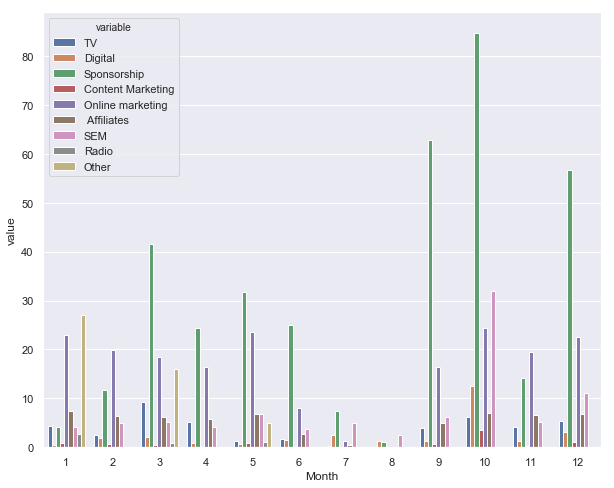

In [161]:
data_media["Year_month"]=data_media["Year"].map(str) + "-" +data_media["Month"].map(str)
data_media[["Year", "Month"]] = data_media[["Year", "Month"]].apply(pd.to_numeric)

#Replacing NA values by zero in Radio and Others investment details
data_media.fillna(0, inplace=True)
data_media
# Visualising
melt=pd.melt(data_media, id_vars=['Year','Month'],value_vars= data_media.columns[3:12])
plt.figure(figsize=(10,8))
sns.barplot(y='value',x='Month', hue='variable',data=melt)

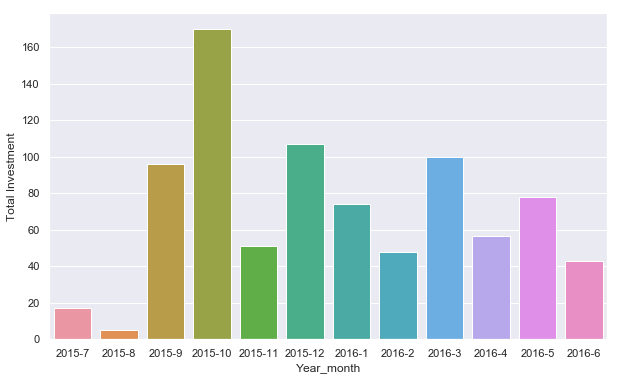

In [162]:
plt.figure(figsize=(10,6))
sns.barplot(y='Total Investment', x='Year_month',data=data_media)

### Inspecting 'NPS' data

In [163]:
data_nps=pd.read_excel("C:/Users/user/Desktop/CAPSTONE/MediaData.xlsx", sheetname='Monthly NPS Score', skiprows=[0,1],index_col=None, header=None)

In [164]:
month_nps_score = data_nps
month_np_score_tr = month_nps_score.transpose()
month_np_score_tr['NPS'] = month_np_score_tr[0]
month_np_score_tr = month_np_score_tr.drop([0],axis=1)
month_np_score_tr['Stock Index'] = month_np_score_tr[1]
month_np_score_tr = month_np_score_tr.drop([1],axis=1)
month_np_score_tr = month_np_score_tr. drop([0], axis=0)
month_np_score_tr['Month'] = [7,8,9,10,11,12,1,2,3,4,5,6]
month_np_score_tr.head(10)

,NPS,Stock Index,Month
1,54.5996,1177,7
2,59.9871,1206,8
3,46.9254,1101,9
4,44.3984,1210,10
5,47,1233,11
6,45.8,1038,12
7,47.093,1052,1
8,50.3274,1222,2
9,49.0206,1015,3
10,51.8276,1242,4


In [165]:
# Merging with the Eleckart
data_nps_ekart = pd.merge(Eleckart,month_np_score_tr,how='inner',on='Month')
Eleckart = data_nps_ekart

In [166]:
Eleckart.shape

(1648824, 24)

#### Filtering and adding features

In [167]:
#Criteria 1: Use the data from July 2015 to June 2016
Eleckart['order_date']= pd.to_datetime(Eleckart['order_date'], errors='coerce')
mask = (Eleckart['order_date'] >= '2015-07-01') & (Eleckart['order_date'] <= '2016-06-30')
Eleckart= Eleckart.loc[mask]
Eleckart.head(5)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,frequency_y,percent,NPS,Stock Index
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,37909,2.299154,44.3984,1210
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,37909,2.299154,44.3984,1210
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,37909,2.299154,44.3984,1210
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,37909,2.299154,44.3984,1210
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,37909,2.299154,44.3984,1210


In [168]:
Eleckart.shape

(1644943, 24)

In [169]:
Eleckart.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
frequency_y                        0
percent                            0
NPS                                0
Stock Index                        0
dtype: int64

In [170]:
#Writing the extracted data July 2015 to June 2016 to a new file called ConsumerElectronicsExtracted.csv'
Eleckart.to_csv('ConsumerElectronicsExtracted.csv')

In [171]:
#Let us address the \N values in the data set ConsumerElectronicsExtracted.csv by replacing it with NA values.
Eleckart1= pd.read_csv('ConsumerElectronicsExtracted.csv', na_values=['\\N',''])
Eleckart1.drop(["Unnamed: 0"], axis = 1, inplace = True)
Eleckart1.head(5)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,frequency_y,percent,NPS,Stock Index
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,NaN,NaN,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,37909,2.299154,44.398389,1210.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,NaN,NaN,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,37909,2.299154,44.398389,1210.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,NaN,NaN,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,37909,2.299154,44.398389,1210.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,NaN,NaN,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,37909,2.299154,44.398389,1210.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,NaN,NaN,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,37909,2.299154,44.398389,1210.0


In [172]:
Eleckart1.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                      0
units                                    0
deliverybdays                      1312149
deliverycdays                      1312148
s1_fact.order_payment_type               0
sla                                      0
cust_id                                  0
pincode                                  0
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5821
product_mrp                              0
product_procurement_sla                  0
frequency_y                              0
percent                                  0
NPS                                      0
Stock Index

In [173]:
Eleckart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644943 entries, 0 to 1644942
Data columns (total 24 columns):
fsn_id                             1644943 non-null object
order_date                         1644943 non-null object
Year                               1644943 non-null int64
Month                              1644943 non-null int64
order_id                           1644943 non-null float64
order_item_id                      1644943 non-null float64
gmv                                1644943 non-null object
units                              1644943 non-null int64
deliverybdays                      332794 non-null float64
deliverycdays                      332795 non-null float64
s1_fact.order_payment_type         1644943 non-null object
sla                                1644943 non-null int64
cust_id                            1644943 non-null object
pincode                            1644943 non-null object
product_analytic_super_category    1644943 non-null object
prod

In [174]:
Eleckart1['gmv']=Eleckart1['gmv'].str.strip()
Eleckart1['gmv']=pd.to_numeric(Eleckart1['gmv'])
Eleckart1['gmv'].fillna(0, inplace=True)

In [175]:
Eleckart1['gmv'].fillna(0, inplace=True)

In [176]:
# Removing rows without product_analytic_data
Eleckart1=Eleckart1[~Eleckart1['product_analytic_vertical'].isnull()]
# Filling the delivery days null values wit '0'
Eleckart1.fillna(0, inplace=True)

In [177]:
#Extracting the day and week from the given data set
Eleckart1['order_date']= pd.to_datetime(Eleckart1['order_date'], errors='coerce')
Eleckart1['Day'] = Eleckart1['order_date'].dt.day

In [178]:
# Introducing Week level data
import math
from datetime import date
origin = date(2015, 7, 1)

def week_number_from(my_date, origin):
    return math.floor((my_date - origin).days / 7 + 1)
Eleckart1['Week'] = Eleckart1['order_date'].apply(lambda x : week_number_from(x.date(), origin))

In [179]:
# As per the information provided in the Excel file  
Eleckart1['Pay_Day']=Eleckart1['Day'].apply(lambda x: 1 if (x == 1 or x == 15) else 0)

In [180]:
Eleckart1['Week'].describe()

count    1.639122e+06
mean     2.803275e+01
std      1.380205e+01
min      1.000000e+00
25%      1.600000e+01
50%      2.800000e+01
75%      4.000000e+01
max      5.300000e+01
Name: Week, dtype: float64

In [181]:
print('The minimum order date {}. The maximum order date {}.'.format(
    Eleckart1.order_date.min(), Eleckart1.order_date.max()))

The minimum order date 2015-07-01 00:36:11. The maximum order date 2016-06-29 23:59:22.


In [182]:
Eleckart1.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_vertical,product_mrp,product_procurement_sla,frequency_y,percent,NPS,Stock Index,Day,Week,Pay_Day
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,...,CameraTripod,7190,0,37909,2.299154,44.398389,1210.0,17,16,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,...,CameraTripod,7190,0,37909,2.299154,44.398389,1210.0,19,16,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,...,CameraTripod,2099,3,37909,2.299154,44.398389,1210.0,20,16,0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,...,CameraTripod,2099,3,37909,2.299154,44.398389,1210.0,14,16,0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,...,CameraTripod,2099,3,37909,2.299154,44.398389,1210.0,17,16,0


#### Introducing Weekly Investment Data

In [193]:
Eleckart1['Weekly_Investment_Total'] = 0.00
Eleckart1['Weekly_Investment_TV'] = 0.00
Eleckart1['Weekly_Investment_Digital'] = 0.00
Eleckart1['Weekly_Investment_Sponsorship'] = 0.00
Eleckart1['Weekly_Investment_Content_Marketing'] = 0.00
Eleckart1['Weekly_Investment_Online_Marketing'] = 0.00
Eleckart1['Weekly_Investment_affiliates'] = 0.00
Eleckart1['Weekly_Investment_SEM'] = 0.00
Eleckart1['Weekly_Investment_Radio'] = 0.00
Eleckart1['Weekly_Investment_Other'] = 0.00

# Weekly investment = (Investment for that month) / 4.5¶
#Total Investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_Total'] = 16.49
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_Total'] = 10.68
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_Total'] = 22.23
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_Total'] = 12.63
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_Total'] = 17.35
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_Total'] = 9.52
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_Total'] = 1.13
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_Total'] = 21.39
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_Total'] = 37.81
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_Total'] = 11.38
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_Total'] = 23.72


#TV investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_TV'] = 0.97
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_TV'] = 0.57
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_TV'] = 2.07
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_TV'] = 1.16
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_TV'] = 0.30
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_TV'] = 0.37
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_TV'] = 0.05
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_TV'] = 0.86
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_TV'] = 1.37
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_TV'] = 0.94
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_TV'] = 1.20


#Digital investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_Digital'] = 0.10
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_Digital'] = 0.43
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_Digital'] = 0.47
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_Digital'] = 0.19
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_Digital'] = 0.17
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_Digital'] = 0.32
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_Digital'] = 0.56
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_Digital'] = 0.28
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_Digital'] = 0.30
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_Digital'] = 2.80
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_Digital'] = 0.28
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_Digital'] = 0.68


#Sponsorship investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_Sponsorship'] = 0.93
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_Sponsorship'] = 2.61
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_Sponsorship'] = 9.24
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_Sponsorship'] = 5.40
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_Sponsorship'] = 7.04
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_Sponsorship'] = 5.57
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_Sponsorship'] = 1.65
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_Sponsorship'] = 0.24
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_Sponsorship'] = 13.95
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_Sponsorship'] =18.82
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_Sponsorship'] = 3.15
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_Sponsorship'] = 12.60



# Content Marketing investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_Content_Marketing'] = 0.20
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_Content_Marketing'] = 0.13
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_Content_Marketing'] = 0.08
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_Content_Marketing'] = 0.01
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_Content_Marketing'] = 0.18
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_Content_Marketing'] = 0.01
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_Content_Marketing'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_Content_Marketing'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_Content_Marketing'] = 0.14
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_Content_Marketing'] = 0.77
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_Content_Marketing'] = 0.04
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_Content_Marketing'] = 0.24




# Online marketing investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_Online_Marketing'] = 5.09
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_Online_Marketing'] = 4.42
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_Online_Marketing'] = 4.10
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_Online_Marketing'] = 3.67
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_Online_Marketing'] = 5.26
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_Online_Marketing'] = 1.77
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_Online_Marketing'] = 0.29
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_Online_Marketing'] = 0.03
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_Online_Marketing'] = 3.64
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_Online_Marketing'] = 5.42
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_Online_Marketing'] = 4.35
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_Online_Marketing'] = 5.00



# Affiliates investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_affiliates'] = 1.64
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_affiliates'] = 1.44
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_affiliates'] = 1.38
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_affiliates'] = 1.27
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_affiliates'] = 1.51
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_affiliates'] = 0.62
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_affiliates'] = 0.12
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_affiliates'] = 0.02
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_affiliates'] = 1.12
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_affiliates'] = 1.55
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_affiliates'] = 1.47
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_affiliates'] = 1.52




#SEM investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_SEM'] = 0.93
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_SEM'] = 1.08
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_SEM'] = 1.15
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_SEM'] = 0.94
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_SEM'] = 1.54
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_SEM'] = 0.83
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_SEM'] = 1.12
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_SEM'] = 0.56
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_SEM'] = 1.38
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_SEM'] = 7.09
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_SEM'] = 1.16
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_SEM'] = 2.48



#Radio investment

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_Radio'] = 0.60
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_Radio'] = 0.19
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_Radio'] = 0.24
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_Radio'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_Radio'] = 0.00




#Other investments

Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 1), 'Weekly_Investment_Other'] = 6.02
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 2), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 3), 'Weekly_Investment_Other'] = 3.54
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 4), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 5), 'Weekly_Investment_Other'] = 1.11
Eleckart1.loc[(Eleckart1['Year'] == 2016) & (Eleckart1['Month'] == 6), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 7), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 8), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 9), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 10), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 11), 'Weekly_Investment_Other'] = 0.00
Eleckart1.loc[(Eleckart1['Year'] == 2015) & (Eleckart1['Month'] == 12), 'Weekly_Investment_Other'] = 0.00


In [194]:
#Check the count of missing values in the columns
Eleckart1.isnull().sum()

fsn_id                                 0
order_date                             0
Year                                   0
Month                                  0
order_id                               0
order_item_id                          0
gmv                                    0
units                                  0
deliverybdays                          0
deliverycdays                          0
s1_fact.order_payment_type             0
sla                                    0
cust_id                                0
pincode                                0
product_analytic_super_category        0
product_analytic_category              0
product_analytic_sub_category          0
product_analytic_vertical              0
product_mrp                            0
product_procurement_sla                0
frequency_y                            0
percent                                0
NPS                                    0
Stock Index                            0
Day             

In [195]:
#Calculating the percentage of null values
round(100*(Eleckart1.isnull().sum()/len(Eleckart1.index)), 2)

fsn_id                                 0.0
order_date                             0.0
Year                                   0.0
Month                                  0.0
order_id                               0.0
order_item_id                          0.0
gmv                                    0.0
units                                  0.0
deliverybdays                          0.0
deliverycdays                          0.0
s1_fact.order_payment_type             0.0
sla                                    0.0
cust_id                                0.0
pincode                                0.0
product_analytic_super_category        0.0
product_analytic_category              0.0
product_analytic_sub_category          0.0
product_analytic_vertical              0.0
product_mrp                            0.0
product_procurement_sla                0.0
frequency_y                            0.0
percent                                0.0
NPS                                    0.0
Stock Index


We have a good healthy dataset, thus removal of these null values will not impact in the end result. 



In [186]:
#Let us check the number of duplicate values in the dataframe
Eleckart1.duplicated().sum()

104816

In [187]:
duplicateRowsDF = Eleckart1[Eleckart1.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
duplicateRowsDF

All Duplicate Rows based on all columns are :


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Weekly_Investment_Total,Weekly_Investment_TV,Weekly_Investment_Digital,Weekly_Investment_Sponsorship,Weekly_Investment_Content_Marketing,Weekly_Investment_Online_Marketing,Weekly_Investment_affiliates,Weekly_Investment_SEM,Weekly_Investment_Radio,Weekly_Investment_Other
5436,ACCE8FTBXFKBNZMY,2015-10-08 12:15:58,2015,10,3.403115e+15,3.403115e+15,240.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
5437,ACCE8FTHTHW6QNCC,2015-10-13 13:08:34,2015,10,2.404475e+15,2.404475e+15,299.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
5438,ACCE8FTHTHW6QNCC,2015-10-05 12:21:24,2015,10,1.403656e+15,1.403656e+15,399.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
5439,ACCE8FTHTHW6QNCC,2015-10-07 21:39:08,2015,10,1.403977e+15,1.403977e+15,299.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
5440,ACCE8FTBXFKBNZMY,2015-10-08 12:15:58,2015,10,3.403115e+15,3.403115e+15,240.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
5441,ACCE8FTHTHW6QNCC,2015-10-13 13:08:34,2015,10,2.404475e+15,2.404475e+15,299.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
5442,ACCE8FTHTHW6QNCC,2015-10-05 12:21:24,2015,10,1.403656e+15,1.403656e+15,399.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
5443,ACCE8FTHTHW6QNCC,2015-10-07 21:39:08,2015,10,1.403977e+15,1.403977e+15,299.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
9735,ACCCYNHKSWFXGRD8,2015-10-01 00:01:32,2015,10,4.404927e+15,4.404927e+15,12585.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0
9736,ACCCYNHKSWFXGRD8,2015-10-01 00:01:32,2015,10,4.404927e+15,4.404927e+15,12585.0,1,0.0,0.0,...,37.81,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0


In [188]:
#From the above list we can see that there are duplicate rows and we intend to keep only one of them.
#Dropping duplicates and keeping the first occurance
Eleckart1.drop_duplicates(keep = 'first', inplace = True)

In [189]:
#There are no duplicate values in the dataframe.
Eleckart1.duplicated().sum()

0

In [190]:
Eleckart1.head(5)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Weekly_Investment_Total,Weekly_Investment_TV,Weekly_Investment_Digital,Weekly_Investment_Sponsorship,Weekly_Investment_Content_Marketing,Weekly_Investment_Online_Marketing,Weekly_Investment_affiliates,Weekly_Investment_SEM,Weekly_Investment_Radio,Weekly_Investment_Other
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,...,37.81,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,...,37.81,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,...,37.81,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,...,37.81,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,...,37.81,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0


In [191]:
Eleckart1.shape

(1534306, 37)

In [192]:
# Percentage of data left from original dataset for analysis
(len(Eleckart1.index)/1648824)*100

93.05456495053444

In [150]:
Eleckart1['gmv'].dtype

dtype('float64')

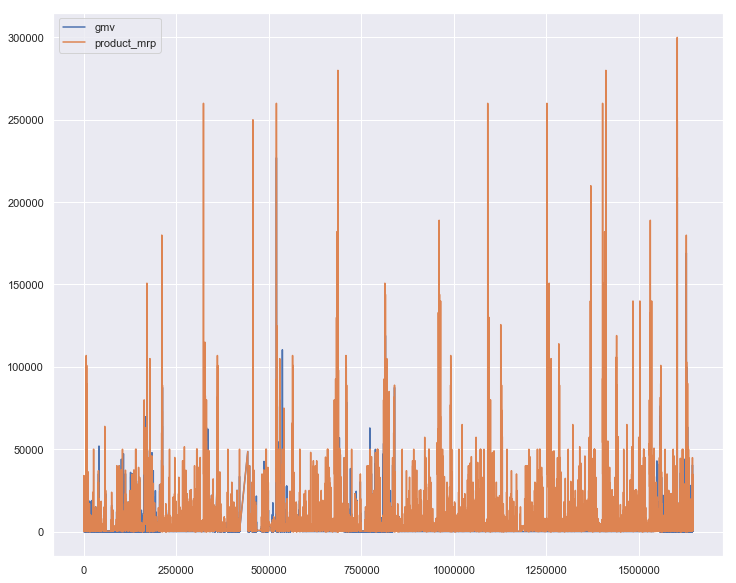

In [196]:
Eleckart1.plot(y=['gmv','product_mrp'],use_index=True,figsize=(12,10))

#### Some GMV Values are greater than their corresponding MRPs, we'll replace such MRPs with GMVs

In [197]:
Eleckart1['product_mrp']=np.where(Eleckart1['gmv']>Eleckart1['product_mrp'],Eleckart1['gmv'],Eleckart1['product_mrp'])

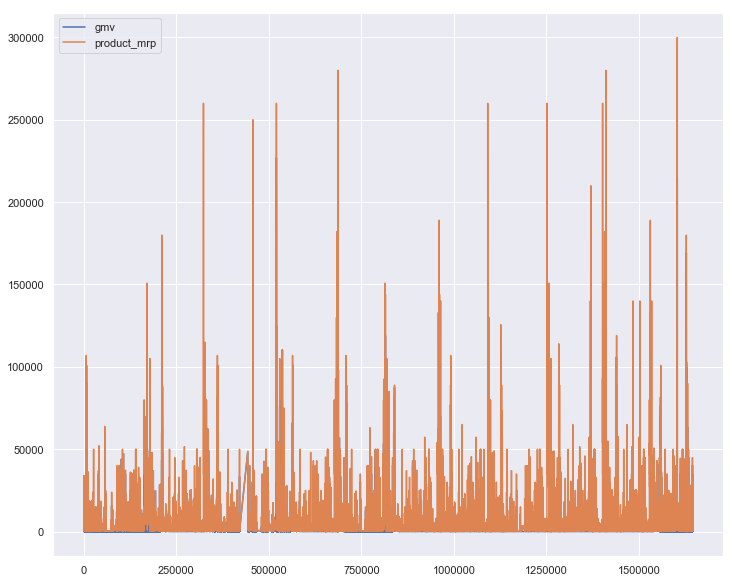

In [198]:
Eleckart1.plot(y=['gmv','product_mrp'],use_index=True,figsize=(12,10))

In [49]:
Eleckart1['s1_fact.order_payment_type'].count()

1529357

In [50]:
Eleckart1['s1_fact.order_payment_type'].unique().tolist()

['COD', 'Prepaid']

In [51]:
#Comparing the percentage
Eleckart1['s1_fact.order_payment_type'].value_counts()/Eleckart1['s1_fact.order_payment_type'].count()

COD        0.721822
Prepaid    0.278178
Name: s1_fact.order_payment_type, dtype: float64

In [199]:
#Creating a column for prepaid flags

Eleckart1.loc[(Eleckart1['s1_fact.order_payment_type'] == "COD"), 's1_fact.order_payment_type'] = 1

Eleckart1.loc[(Eleckart1['s1_fact.order_payment_type'] == "Prepaid"), 's1_fact.order_payment_type'] = 0

Eleckart1['s1_fact.order_payment_type'] = pd.to_numeric(Eleckart1['s1_fact.order_payment_type'])

In [200]:
Eleckart1['Prepaid_Flag'] = 1
Eleckart1.loc[(Eleckart1['s1_fact.order_payment_type'] == 1), 'Prepaid_Flag'] = 0

##### From the above output it is clear that COD (Cash on Delivery is the preferred one).

In [201]:
# Checking the number of rows
Eleckart1['sla'].count()

1534306

#### Inspecting and preparing pincode column

In [202]:
# Checking the number of unique pincodes
Eleckart1['pincode'].nunique()

17852

In [203]:
# Replacing Empty spaces with NaNs
Eleckart1['pincode'].replace(r'\s+', np.nan,regex=True,inplace=True)
# Removing rows where pincode Values are Null
Eleckart1=Eleckart1[~Eleckart1.pincode.isnull()]

In [204]:
Eleckart1['pincode'].nunique()

17851

##### There are a total of 17851 unique pincodes

#### Inspecting Customer IDs

In [205]:
# Checking for unique customer IDs
Eleckart1['cust_id'].nunique()

1262969

In [206]:
# Replacing Empty spaces with NaNs
Eleckart1['cust_id'].replace(r'\s+', np.nan,regex=True,inplace=True)
# Removing rows where pincode Values are Null
Eleckart1=Eleckart1[~Eleckart1.cust_id.isnull()]

In [207]:
print("Count of rows with Customer ID value equal to '0' = {}".format(Eleckart1[Eleckart1['cust_id']==0].shape[0]))
#Removing these rows
Eleckart1=Eleckart1[Eleckart1['cust_id']!=0]
print("After removing such rows")
Eleckart1[Eleckart1['cust_id']==0].shape[0]

Count of rows with Customer ID value equal to '0' = 0
After removing such rows


0

In [208]:
Eleckart['cust_id'].describe()

count     1644943
unique    1250572
top              
freq         4904
Name: cust_id, dtype: object

#### Inspecting MRP

In [209]:
# Checking the distribution of product_mrp
Eleckart1['product_mrp'].describe()

count    1.530281e+06
mean     4.159152e+03
std      8.623414e+03
min      0.000000e+00
25%      7.990000e+02
50%      1.599000e+03
75%      3.499000e+03
max      2.999990e+05
Name: product_mrp, dtype: float64

##### Some MRP values are given as Zero, which is an anomaly 

In [210]:
mrp_count = Eleckart1['product_mrp'].count()
print("mrp_count {}" .format(mrp_count))


mrp_count 1530281


In [211]:
Eleckart1[Eleckart1['product_mrp']==0]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Weekly_Investment_TV,Weekly_Investment_Digital,Weekly_Investment_Sponsorship,Weekly_Investment_Content_Marketing,Weekly_Investment_Online_Marketing,Weekly_Investment_affiliates,Weekly_Investment_SEM,Weekly_Investment_Radio,Weekly_Investment_Other,Prepaid_Flag
15971,ACCDMWRZXKRGMDS9,2015-10-07 11:01:47,2015,10,2.410512e+15,2.410512e+15,0.0,3,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0
15972,ACCDMWRZXKRGMDS9,2015-10-09 07:49:25,2015,10,3.412033e+15,3.412033e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
15973,ACCDMWRZXKRGMDS9,2015-10-09 14:58:23,2015,10,4.412365e+15,4.412365e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
15974,ACCDMWRZXKRGMDS9,2015-10-10 02:53:51,2015,10,1.412808e+15,1.412808e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
15975,ACCDMWRZXKRGMDS9,2015-10-10 10:45:57,2015,10,1.413091e+15,1.413091e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
15976,ACCDMWRZXKRGMDS9,2015-10-11 19:46:13,2015,10,4.414270e+15,4.414270e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
15977,ACCDMWRZXKRGMDS9,2015-10-13 20:00:54,2015,10,1.416019e+15,1.416019e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0
15978,ACCDMWRZXKRGMDS9,2015-10-15 00:14:23,2015,10,1.417025e+15,1.417025e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
15980,ACCDMWRZXKRGMDS9,2015-10-07 12:08:32,2015,10,2.410550e+15,2.410550e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
15981,ACCDMWRZXKRGMDS9,2015-10-09 21:15:35,2015,10,3.412607e+15,3.412607e+15,0.0,1,0.0,0.0,...,1.37,2.80,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0


#### A Total of 2257 rows have MRPs as Zero
These rows can be removed

In [212]:
Eleckart1=Eleckart1[Eleckart1['product_mrp']!=0]

In [213]:
# Checking super_category
Eleckart1['product_analytic_super_category'].nunique()

1

#### There is only one single value in the  product_analytic_super_category

In [214]:
Eleckart1['product_analytic_super_category'].unique().tolist()

['CE']

In [215]:
#Product analytic category
Eleckart1['product_analytic_category'].value_counts()

EntertainmentSmall    871362
CameraAccessory       237669
GamingHardware        216075
GameCDDVD             107197
Camera                 95721
Name: product_analytic_category, dtype: int64

In [216]:
Eleckart1['product_analytic_sub_category'].describe()

count     1528024
unique         14
top       Speaker
freq       500940
Name: product_analytic_sub_category, dtype: object

In [217]:
Eleckart1['product_analytic_sub_category'].value_counts()

Speaker                500940
CameraAccessory        221056
GamingAccessory        188552
TVVideoSmall           132866
HomeAudio              115009
Game                   107100
AudioMP3Player         104213
Camera                  95721
GamingConsole           27523
CameraStorage           16613
AudioAccessory          10705
HomeTheatre              4172
AmplifierReceiver        3457
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [218]:
Eleckart1['product_analytic_vertical'].value_counts()

LaptopSpeaker              265038
MobileSpeaker              235902
AudioMP3Player             104213
PhysicalGame                98128
HomeAudioSpeaker            79801
GamingHeadset               59807
DSLR                        54936
GamePad                     53592
Flash                       47704
SelectorBox                 43196
CameraBattery               36997
RemoteControl               36476
GamingMouse                 35577
Point & Shoot               35317
VideoGlasses                34630
CameraTripod                33311
Lens                        32882
FMRadio                     25399
VideoPlayer                 18564
HandheldGamingConsole       18187
CameraStorageMemoryCard     16613
CameraBag                   16177
CameraBatteryCharger        14638
Binoculars                  13502
Filter                      11599
GamingConsole                9336
CodeInTheBoxGame             8972
GamingAccessoryKit           8672
Microphone                   8341
TVOutCableAcce

### Checking for columns with negative entries

In [221]:
Eleckart1['product_procurement_sla'].describe()

count    1.528024e+06
mean     5.396158e+00
std      5.291712e+01
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.000000e+03
Name: product_procurement_sla, dtype: float64

#### There are some negative values that have to be removed

In [220]:
#Replacing all negatives values in the dataframe with zero

Eleckart1[Eleckart1['product_procurement_sla'] < 0]=0

In [72]:
Eleckart1['product_analytic_sub_category'].value_counts()

Speaker                461422
CameraAccessory        215453
GamingAccessory        185228
TVVideoSmall           132831
HomeAudio              110923
AudioMP3Player         103213
Game                   100682
Camera                  87396
0                       70080
GamingConsole           26972
CameraStorage           16539
AudioAccessory          10674
HomeTheatre              4172
AmplifierReceiver        3457
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [73]:
Eleckart1.head()

,fsn_id,order_date,Year_x,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Other,Year_month,NPS,Stock Index,Day,Week,Year,special_sales,sales_start_week,sales_end_week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,...,0.0,2015-10,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,...,0.0,2015-10,44.398389,1210.0,19,16,2015.0,(17-15th Oct),16.0,16.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,...,0.0,2015-10,44.398389,1210.0,20,16,2015.0,(17-15th Oct),16.0,16.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,...,0.0,2015-10,44.398389,1210.0,14,16,2015.0,(17-15th Oct),16.0,16.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,...,0.0,2015-10,44.398389,1210.0,17,16,2015.0,(17-15th Oct),16.0,16.0


In [222]:
# Checking for outliers in the continuous variables
num = Eleckart1[['gmv','units','sla','product_mrp','product_procurement_sla']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num.describe(percentiles=[.01,.05,.08, .1,.25, .5, .75, .90, .95, .99])

,gmv,units,sla,product_mrp,product_procurement_sla
count,1.528024e+06,1.528024e+06,1.528024e+06,1.528024e+06,1.528024e+06
mean,8.956548e+02,9.760279e-01,5.506644e+00,4.013722e+03,5.396158e+00
std,3.388360e+03,3.274979e-01,3.159364e+00,8.502740e+03,5.291712e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5%,0.000000e+00,1.000000e+00,1.000000e+00,2.500000e+02,0.000000e+00
8%,0.000000e+00,1.000000e+00,1.000000e+00,3.890000e+02,1.000000e+00
10%,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+02,1.000000e+00
25%,0.000000e+00,1.000000e+00,4.000000e+00,7.900000e+02,1.000000e+00
50%,0.000000e+00,1.000000e+00,5.000000e+00,1.499000e+03,2.000000e+00


In [224]:
#Outlier removal gmv 
__gmv = np.percentile(Eleckart1.gmv, [0, 99])
Eleckart1 = Eleckart1[(Eleckart1.gmv >= __gmv[0]) & (Eleckart1.gmv <= __gmv[1])]


#Outlier removal sla
__sla = np.percentile(Eleckart1.sla, [0, 99])
Eleckart1 = Eleckart1[(Eleckart1.sla >= __sla[0]) & (Eleckart1.sla <= __sla[1])]


#Outlier removal Product mrp
__mrp = np.percentile(Eleckart1.product_mrp, [0, 99])
Eleckart1 = Eleckart1[(Eleckart1.product_mrp >= __mrp[0]) & (Eleckart1.product_mrp <= __mrp[1])]


#Outlier removal Units
__units = np.percentile(Eleckart1.units, [0, 99])
Eleckart1 = Eleckart1[(Eleckart1.units >= __units[0]) & (Eleckart1.units <= __units[1])]


#Outlier removal product_procurement_sla
__prosla = np.percentile(Eleckart1.product_procurement_sla, [0, 99])
Eleckart1 = Eleckart1[(Eleckart1.product_procurement_sla >= __prosla[0]) & (Eleckart1.product_procurement_sla <= __prosla[1])]

### Creating Separate datasets for Camera Accessories, Gaming Accessory and Home Audio

In [225]:
print(Eleckart1.product_analytic_sub_category.isnull().sum())

Eleckart1['product_analytic_sub_category'].replace(r'\s+', np.nan,regex=True,inplace=True)
Eleckart1=Eleckart1[Eleckart1['product_analytic_sub_category']!=0]

df1=Eleckart1.product_analytic_sub_category.str.contains('CameraAccessory')
CameraAccessory=Eleckart1[df1]

df2=Eleckart1.product_analytic_sub_category.str.contains('GamingAccessory')
GamingAccessory=Eleckart1[df2]

df3=Eleckart1.product_analytic_sub_category.str.contains('HomeAudio')
HomeAudio=Eleckart1[df3]

0


<Figure size 432x288 with 0 Axes>

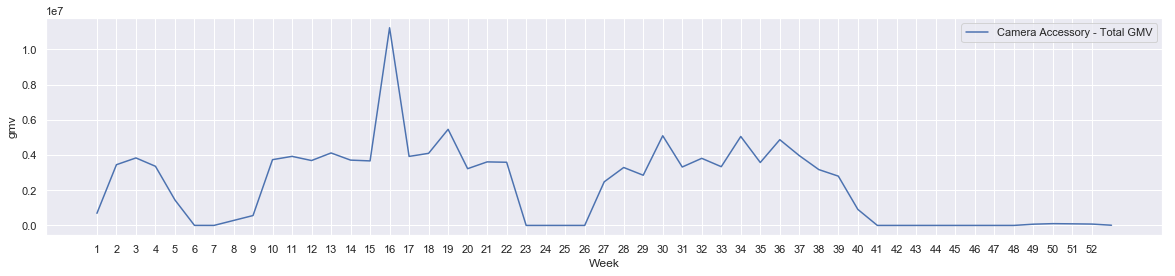

<Figure size 432x288 with 0 Axes>

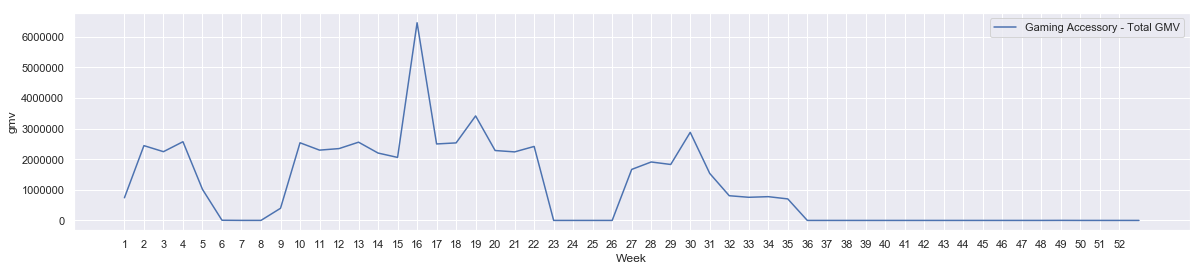

<Figure size 432x288 with 0 Axes>

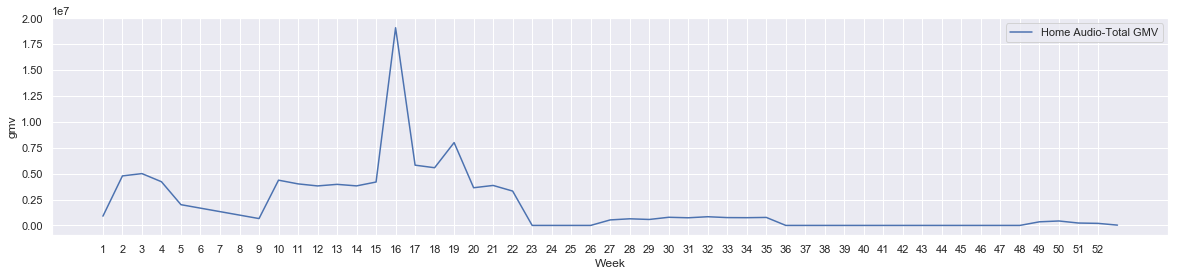

In [226]:
# line plot for the total GMV of sub-categories vs Week number
a=CameraAccessory.pivot_table(values='gmv',index='Week',aggfunc='sum')
b=GamingAccessory.pivot_table(values='gmv',index='Week',aggfunc='sum')
c=HomeAudio.pivot_table(values='gmv',index='Week',aggfunc='sum')

#Subplot 1
plt.figure(1)
plt.figure(figsize=(20,4))
sns.set()
sns.lineplot(y='gmv',x=a.index,data=a, label='Camera Accessory - Total GMV').set_xticks(np.arange(1,53,1))

plt.show()

#Subplot 2

plt.figure(2)
plt.figure(figsize=(20,4))
sns.set()
sns.lineplot(y='gmv',x=b.index,data=b, label='Gaming Accessory - Total GMV').set_xticks(np.arange(1,53,1))

plt.show()

#Subplot 3
plt.figure(3)
plt.figure(figsize=(20,4))
sns.set()
sns.lineplot(y='gmv',x=c.index,data=c, label='Home Audio-Total GMV', ).set_xticks(np.arange(1,53,1))

plt.show()

In [227]:
Eleckart1.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,Weekly_Investment_TV,Weekly_Investment_Digital,Weekly_Investment_Sponsorship,Weekly_Investment_Content_Marketing,Weekly_Investment_Online_Marketing,Weekly_Investment_affiliates,Weekly_Investment_SEM,Weekly_Investment_Radio,Weekly_Investment_Other,Prepaid_Flag
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,0.0,...,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,0.0,...,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,0.0,...,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,0.0,...,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,0.0,...,1.37,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1


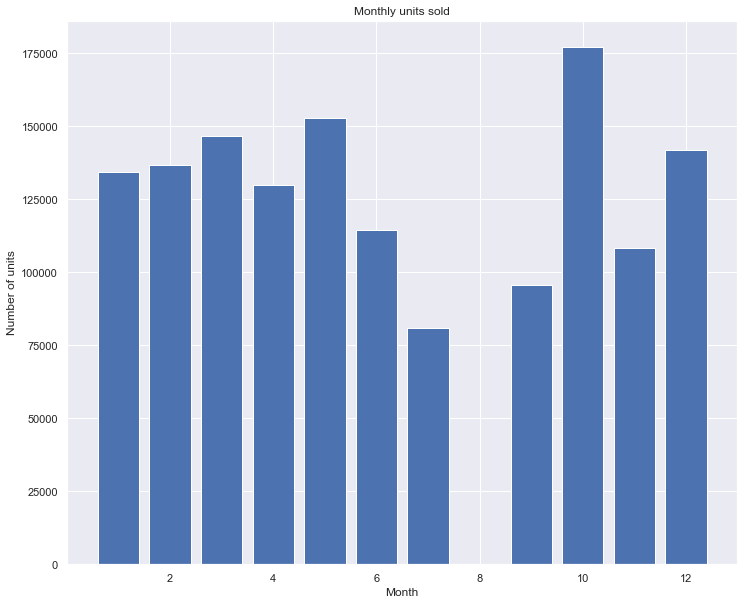

In [228]:
# Monthly units sold
agg=Eleckart1.groupby('Month').units.sum()
plt.figure(figsize=(12,10))
plt.bar(agg.index,agg.values)
plt.xlabel('Month')
plt.ylabel('Number of units')
plt.title('Monthly units sold')
plt.show()

#### October saw the highest number of units sold

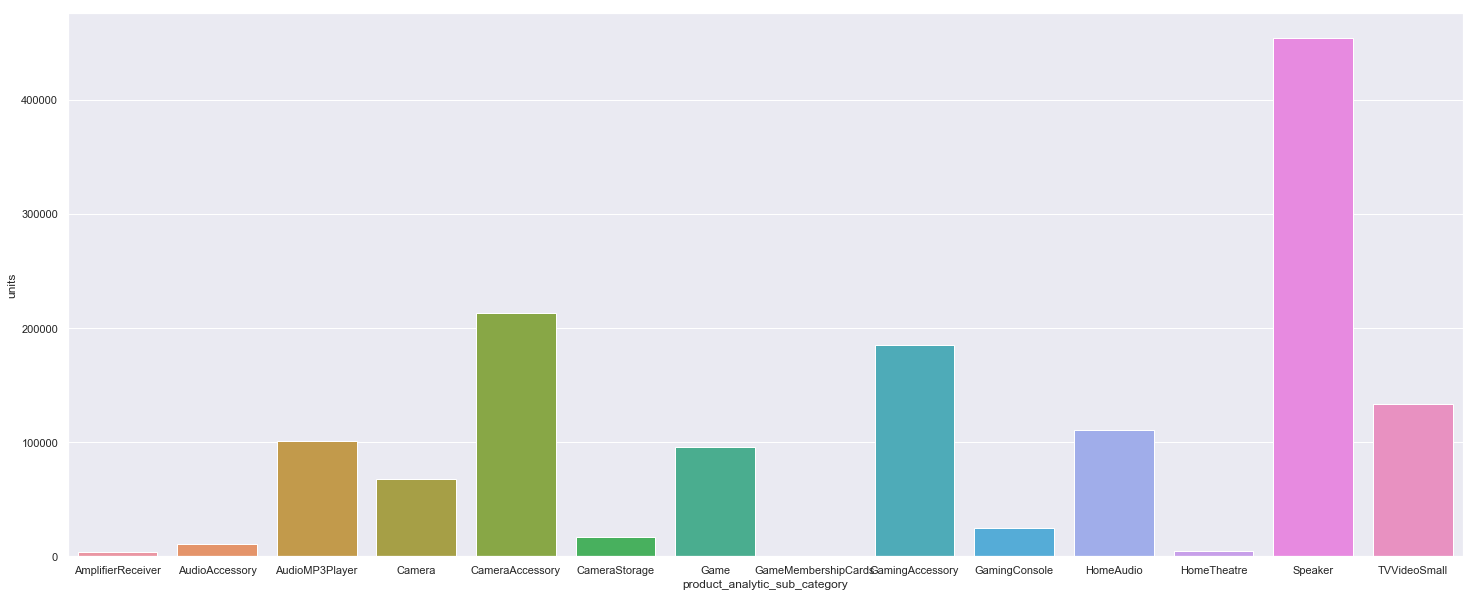

In [229]:

agg = Eleckart1.pivot_table(values='units',index='product_analytic_sub_category',aggfunc='sum')
plt.figure(figsize=(25,10))
sns.barplot(x=agg.index, y='units', data=agg)

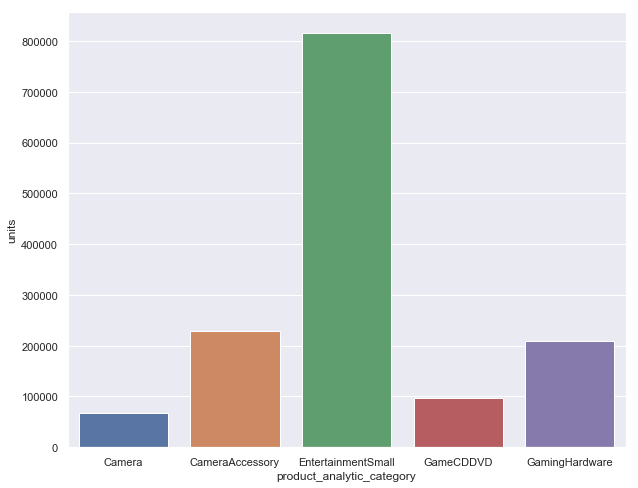

In [230]:
### Aggregated orders by product category
agg = Eleckart1.pivot_table(values='units',index='product_analytic_category',aggfunc='sum')
plt.figure(figsize=(10,8))
sns.barplot(x=agg.index, y='units', data=agg)

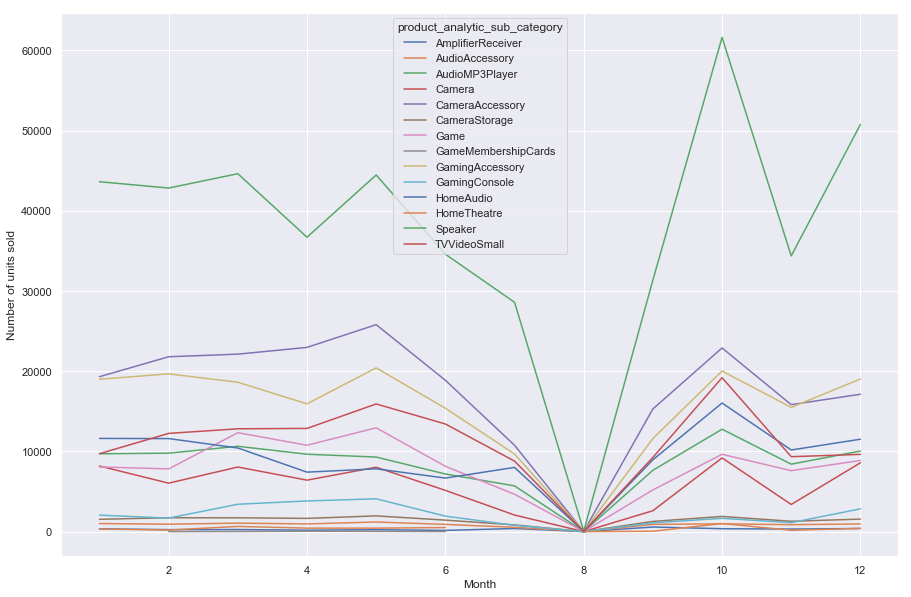

In [231]:
# Aggregated Monthly orders by product sub-category
agg=Eleckart1.pivot_table(values = 'units', 
                      index = 'Month', 
                      columns = 'product_analytic_sub_category', 
                      aggfunc = 'sum')
agg.plot(figsize=(15,10))
plt.ylabel('Number of units sold')
plt.show()

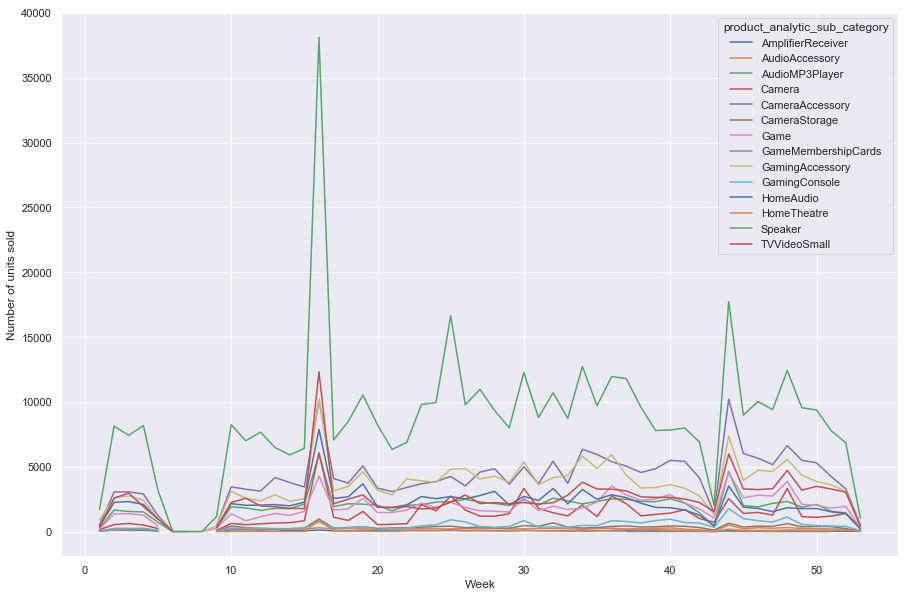

In [232]:
# Aggregated weekly orders by product sub-category
agg=Eleckart1.pivot_table(values = 'units', 
                      index = 'Week', 
                      columns = 'product_analytic_sub_category', 
                      aggfunc = 'sum')
agg.plot(figsize=(15,10))
plt.ylabel('Number of units sold')
plt.show()

Text(0,0.5,'Units Sold')

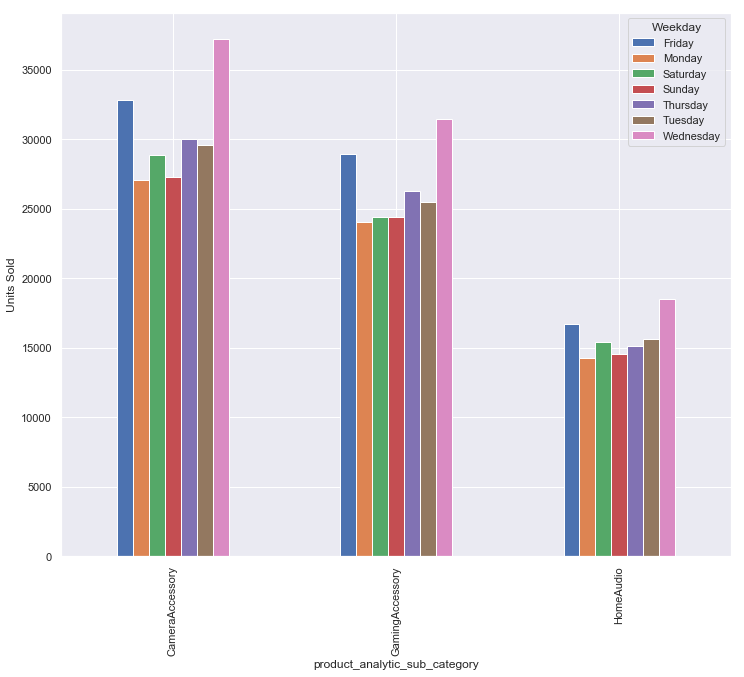

In [233]:
## Aggregated units sold on weekdays/weekends
merge=pd.concat([CameraAccessory,GamingAccessory,HomeAudio],axis=0).reset_index()
merge['order_date']=pd.to_datetime(merge['order_date'], errors='coerce')

import datetime
def dow(date):
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=date.weekday()
    return days[dayNumber]
merge['Weekday'] = merge['order_date'].apply(lambda x : dow(x))

agg=merge.pivot_table(values = 'units', 
                      index = 'product_analytic_sub_category', 
                      columns = 'Weekday', 
                      aggfunc = 'sum')

agg.plot(kind='bar',figsize=(12,10))
plt.ylabel('Units Sold')

Text(0,0.5,'GMV')

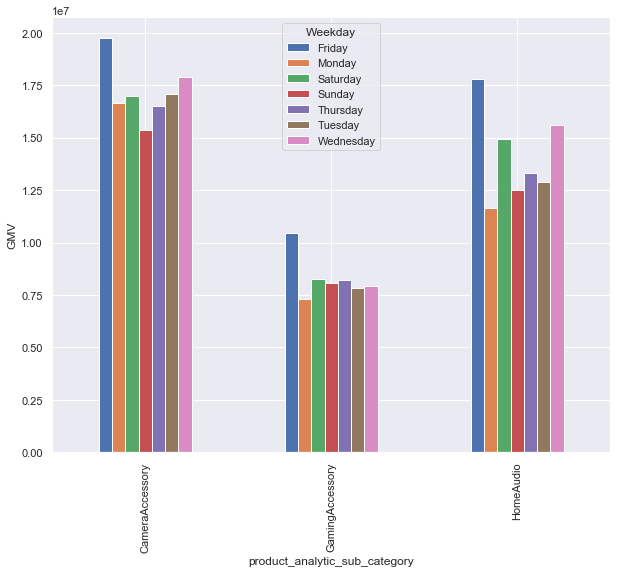

In [234]:
agg=merge.pivot_table(values = 'gmv', 
                      index = 'product_analytic_sub_category', 
                      columns = 'Weekday', 
                      aggfunc = 'sum')
agg.plot(kind='bar',figsize=(10,8))
plt.ylabel('GMV')

Wednesday and Friday show the highest sales both in terms of 'GMV' and 'Units'

Text(0,0.5,'Units sold')

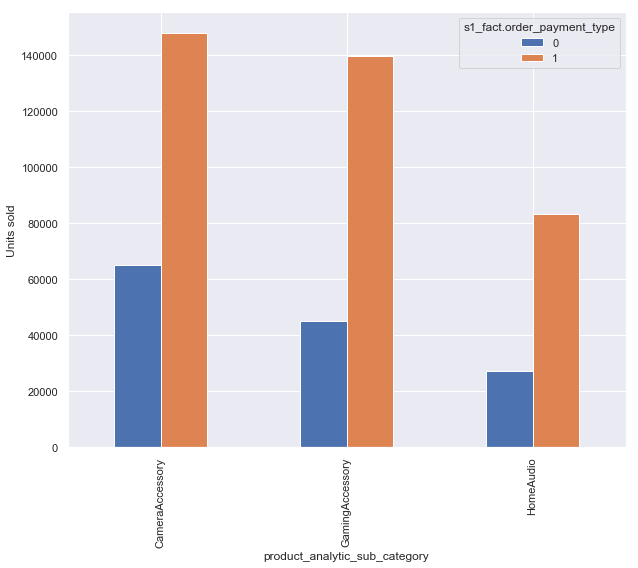

In [235]:
## Aggregated Monthly orders by different payment types
agg=merge.pivot_table(values = 'units', 
                      index = 'product_analytic_sub_category', 
                      columns = 's1_fact.order_payment_type', 
                      aggfunc = 'sum')
agg.plot(kind='bar',figsize=(10,8))
plt.ylabel('Units sold')

Text(0,0.5,'Units sold')

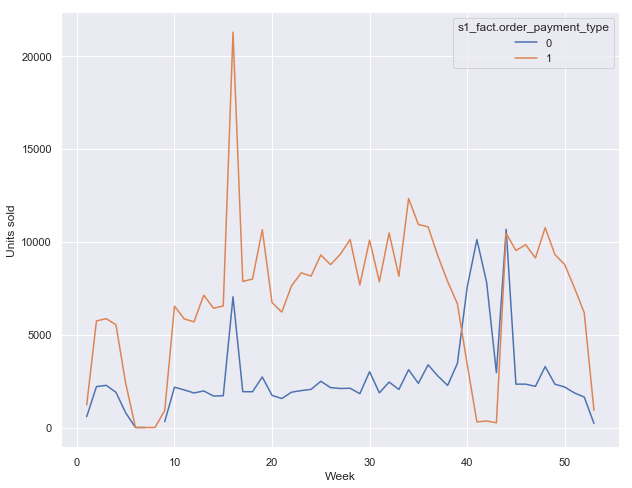

In [236]:
agg=merge.pivot_table(values = 'units', 
                      index = 'Week', 
                      columns = 's1_fact.order_payment_type', 
                      aggfunc = 'sum')
agg.plot(kind='line',figsize=(10,8))
plt.ylabel('Units sold')

### Visualizing media investment data

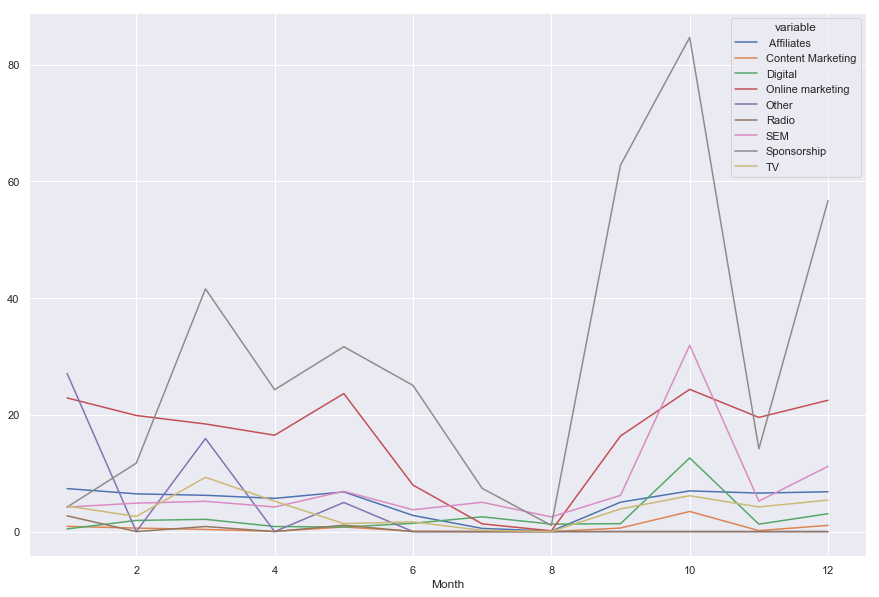

In [237]:
melt_pivot=melt.pivot_table(values = 'value', 
                      index = 'Month', 
                      columns = 'variable', 
                      aggfunc = 'sum')
melt_pivot.plot(figsize=(15,10))

Ad Spends are high throughout the year and high during the promotional events especially befor Dussera,Diwali and New Year.
This Period also sees the maximum sale of units

In [238]:
merge.isnull().sum()

index                                  0
fsn_id                                 0
order_date                             0
Year                                   0
Month                                  0
order_id                               0
order_item_id                          0
gmv                                    0
units                                  0
deliverybdays                          0
deliverycdays                          0
s1_fact.order_payment_type             0
sla                                    0
cust_id                                0
pincode                                0
product_analytic_super_category        0
product_analytic_category              0
product_analytic_sub_category          0
product_analytic_vertical              0
product_mrp                            0
product_procurement_sla                0
frequency_y                            0
percent                                0
NPS                                    0
Stock Index     

In [239]:
# Removing space from column heading
merge=merge.rename(columns = {' Affiliates':'Affiliates'})

In [241]:

# Saving the master dataset for the required sub categories
merge.to_csv('Master_data.csv')

In [242]:
master_data=merge
master_data.head()

,index,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,...,Weekly_Investment_Digital,Weekly_Investment_Sponsorship,Weekly_Investment_Content_Marketing,Weekly_Investment_Online_Marketing,Weekly_Investment_affiliates,Weekly_Investment_SEM,Weekly_Investment_Radio,Weekly_Investment_Other,Prepaid_Flag,Weekday
0,0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,0.0,...,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0,Saturday
1,1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,0.0,...,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0,Monday
2,2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,0.0,...,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,0,Tuesday
3,3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,0.0,...,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1,Wednesday
4,4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,0.0,...,2.8,18.82,0.77,5.42,1.55,7.09,0.0,0.0,1,Saturday


In [243]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 40 columns):
index                                  500192 non-null int64
fsn_id                                 500192 non-null object
order_date                             500192 non-null datetime64[ns]
Year                                   500192 non-null int64
Month                                  500192 non-null int64
order_id                               500192 non-null float64
order_item_id                          500192 non-null float64
gmv                                    500192 non-null float64
units                                  500192 non-null int64
deliverybdays                          500192 non-null float64
deliverycdays                          500192 non-null float64
s1_fact.order_payment_type             500192 non-null int64
sla                                    500192 non-null int64
cust_id                                500192 non-null object
pincode       

#### In next notebook Weekly dataframe for Camera Accessory, Gaming Accessory, Home Audio with addition of 'Special Sales' data and 'Ontario Weather' data